<a href="https://colab.research.google.com/github/xLustosa/freecodecamp/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

**Use the data to complete the following tasks:**

* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
* Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.


For each chart, make sure to use a copy of the data frame. Unit tests are written for you under test_module.py.

The boilerplate also includes commands to save and return the image.

**Development**

For development, you can use main.py to test your functions. Click the "run" button and main.py will run.

**Testing**

We imported the tests from test_module.py to main.py for your convenience. The tests will run automatically whenever you hit the "run" button.

**Submitting**

Copy your project's URL and submit it to freeCodeCamp.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/xLustosa/freecodecamp/main/fcc-forum-pageviews.csv'
df = pd.read_csv(url)

In [2]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [3]:
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975)) ]

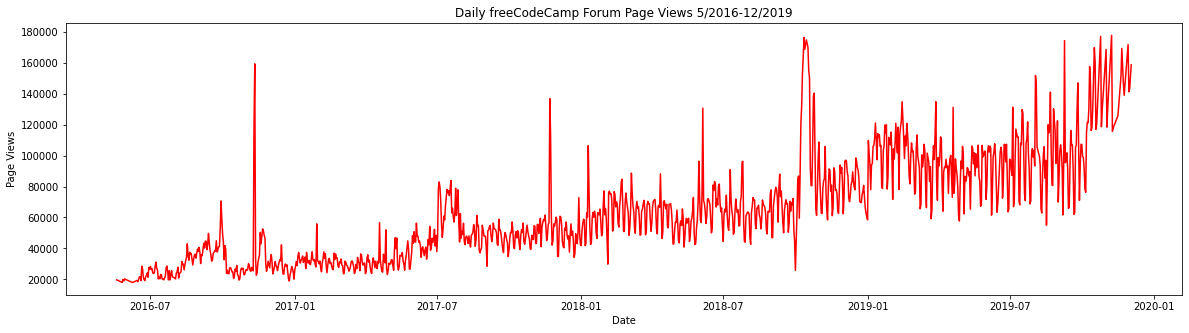

In [4]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(df.index, df.value, color='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
fig.savefig('line_plot.png')




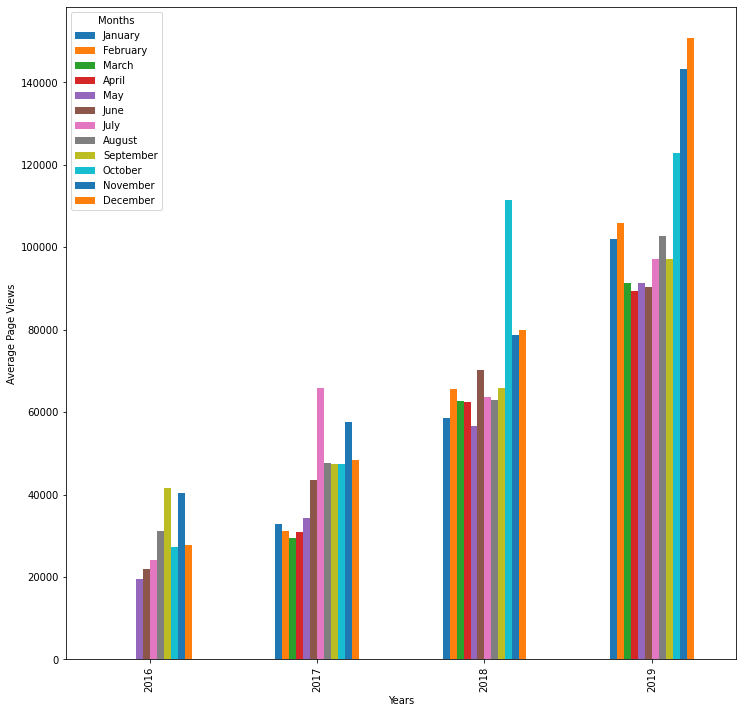

In [5]:
df_bar = df.copy()
df_bar["month"] = df_bar.index.month
df_bar["year"] = df_bar.index.year
df_bar = df_bar.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()

fig = df_bar.plot(kind ="bar", legend = True, figsize = (12,12)).figure
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

fig.savefig('bar_plot.png')

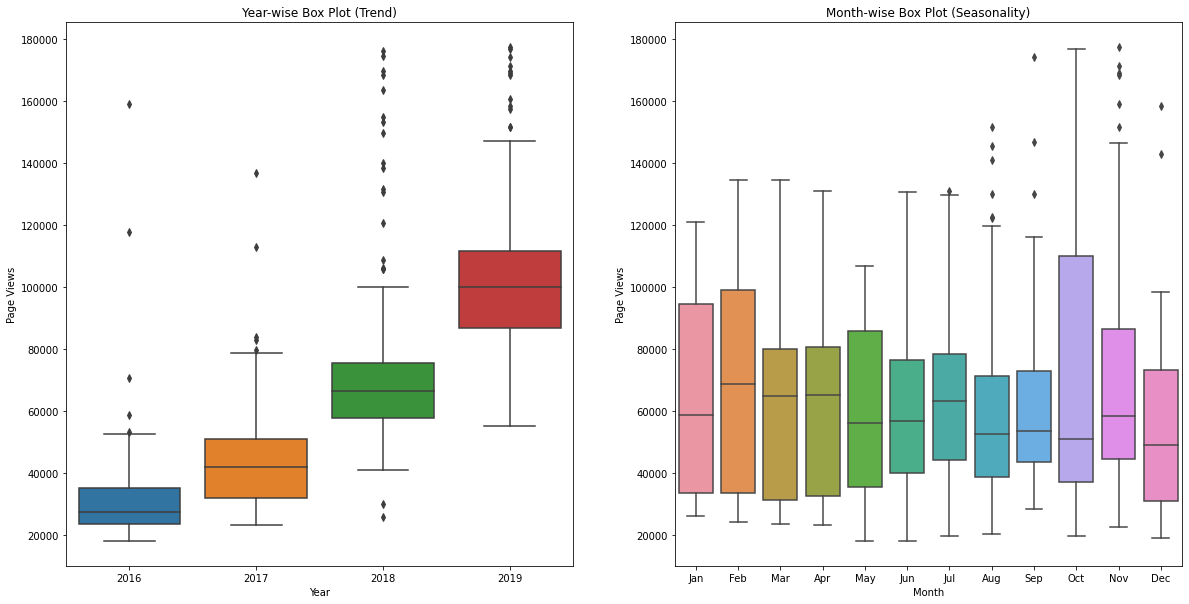

In [6]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

plt.show()
fig.savefig('box_plot.png')